<a href="https://colab.research.google.com/github/SaintNickG/SQL/blob/main/SQL_Queries(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  SQL Queries (Core)

- Author : Nicholas Giuffrida

In [1]:
# Downgrade sqlalchemy
!pip install --upgrade 'sqlalchemy<2.0'

In [2]:
import pandas as pd
from sqlalchemy import create_engine
pd.set_option('display.max_columns',50)

In [3]:
# Confirm version
import sqlalchemy
sqlalchemy.__version__

'1.4.49'

In [4]:
# Save the file id from the Share URL
FILEID = "15zRAJ98a-WO8Nt0U3IACZM8zFl1SAkCi"
# Set the output filename
FILENAME = 'schools.db'
# Run wget command (web-get)
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O {FILENAME}

--2023-09-19 22:14:36--  https://docs.google.com/uc?export=download&id=15zRAJ98a-WO8Nt0U3IACZM8zFl1SAkCi
Resolving docs.google.com (docs.google.com)... 173.194.203.102, 173.194.203.101, 173.194.203.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t2lh5og97ve71djtrjmaokd0nlhvg7bu/1695161625000/07032743932305917350/*/15zRAJ98a-WO8Nt0U3IACZM8zFl1SAkCi?e=download&uuid=2b432a66-28db-466b-8c68-7e68c9477e4f [following]
--2023-09-19 22:14:36--  https://doc-0o-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t2lh5og97ve71djtrjmaokd0nlhvg7bu/1695161625000/07032743932305917350/*/15zRAJ98a-WO8Nt0U3IACZM8zFl1SAkCi?e=download&uuid=2b432a66-28db-466b-8c68-7e68c9477e4f
Resolving doc-0o-c0-docs.googleusercontent.com (doc-0o-c0-docs.googleusercontent.com)... 142.250.99.132, 2607:f

In [5]:
# create sqlite engine for a database called schools
engine = create_engine('sqlite:///schools.db')
# create connection to database via the engine
conn = engine.connect()

In [6]:
# check what tables are included in the database
q = """SELECT * FROM sqlite_master"""
pd.read_sql(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,school_details,school_details,2,"CREATE TABLE school_details (\n\t""DistrictName..."
1,table,facility_details,facility_details,4,"CREATE TABLE facility_details (\n\t""Establishm..."


In [7]:
q = """SELECT AVG(`BACDistance (in Km)`) AS avg_bac_distance
FROM school_details;
"""
pd.read_sql(q, conn)

,avg_bac_distance
0,12.681822


##  1. What is the average BACDistance (in Km)?

 - ~12.68











In [8]:
q = """SELECT SchoolLevel, AVG(`BACDistance (in Km)`)
FROM school_details
GROUP BY SchoolLevel
ORDER BY AVG(`BACDistance (in Km)`) DESC;
"""
pd.read_sql(q, conn)

,SchoolLevel,AVG(`BACDistance (in Km)`)
0,JHS,13.692647
1,PS,12.830787
2,SS,12.630872
3,SSS,10.863095
4,LPS,5.368421
5,None,NaN


##  2. What is the average BACDistance (in Km) by School Level? Sort the results from highest average to lowest average.
* JHS	13.692647
*	PS	12.830787
*	SS	12.630872
*	SSS	10.863095
*	LPS	5.368421

##  3. Repeat the previous query, but only display results where the average distance is at least 10 km.

In [9]:
q = """ SELECT SchoolLevel, AVG(`BACDistance (in Km)`) AS avg_bac_distance
FROM school_details
GROUP BY SchoolLevel
HAVING avg_bac_distance > 10
ORDER BY avg_bac_distance;
"""
pd.read_sql(q, conn)

,SchoolLevel,avg_bac_distance
0,SSS,10.863095
1,SS,12.630872
2,PS,12.830787
3,JHS,13.692647


##  4. Join the two tables together (school_details and facility_details). Start by displaying all of the columns, but limit the resulting rows to just 2.

In [10]:
# Preview 2 rows from school_details table
q = """SELECT *
FROM school_details
LIMIT 2"""
pd.read_sql(q, conn)

,DistrictName,EstablishmentCode,EstablishmentName,BRCName,CRCName,SchoolLevel,ManagementName,LocalityHabitation,SubdivisionName,ConstituencyName,RevenueBlockName,CivicBodyName,WardName,PostOfficeName,PhoneNo,FaxNo,EmailID,Website,LocatedInRuralOrUrban,DiseCode,EstablishedDate,DistrictHQDistance (in Km),CRCDistance (in Km),BACDistance (in Km),IsRecognized,RecognizedBy,ContactPersonName,LowestClass,HighestClass,BoardName
0,East,S0169,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,PS,State Govt.,BUDANG,Gangtok,Rhenock,Central Pendam,Central Pendam,Sajong,Upper Pendam,None,None,None,None,Urban Area,None,28126,58.0,8.0,16.0,Recognized,HRDD,None,Class 1,Class 5,None
1,East,S0099,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SSS,State Govt.,CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Karmithang,Upper Pendam,3592263812,None,None,None,Urban Area,800401,15342,50.0,0.0,6.0,Recognized,HRDD,None,Class 1,Class 12,C.B.S.E.


In [11]:
# Preview 2 rows from facility_details table
q= """SELECT *
FROM facility_details
LIMIT 2"""
pd.read_sql(q, conn)

,EstablishmentCode,EstablishmentName,IsLibraryAvailable,AvailableBooksCount,IsFireExtgAvailable,ExtinguisherCount,HOIRoomAvailable,IsStaffRoomAvailable,NoofStaffRoom,IsLockerForStaffAvailable,IsSportsStoreRoomAvailable
0,S1034,(I.E.C) INDIAN EVANGALISTIC CRUSADE MISSION PR...,Not Available,0,Available,1,Available,Not Available,0,Not Available,Not Available
1,S0516,10TH MILE GOVERNMENT PRIMARY SCHOOL,Not Available,0,Not Available,0,Available,Available,1,Not Available,Not Available


In [12]:
# Create the left table from school_details
q = """SELECT *
FROM school_details"""
left_table = pd.read_sql(q, engine)
left_table.head(2)

,DistrictName,EstablishmentCode,EstablishmentName,BRCName,CRCName,SchoolLevel,ManagementName,LocalityHabitation,SubdivisionName,ConstituencyName,RevenueBlockName,CivicBodyName,WardName,PostOfficeName,PhoneNo,FaxNo,EmailID,Website,LocatedInRuralOrUrban,DiseCode,EstablishedDate,DistrictHQDistance (in Km),CRCDistance (in Km),BACDistance (in Km),IsRecognized,RecognizedBy,ContactPersonName,LowestClass,HighestClass,BoardName
0,East,S0169,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,PS,State Govt.,BUDANG,Gangtok,Rhenock,Central Pendam,Central Pendam,Sajong,Upper Pendam,None,None,None,None,Urban Area,None,28126,58.0,8.0,16.0,Recognized,HRDD,None,Class 1,Class 5,None
1,East,S0099,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SSS,State Govt.,CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Karmithang,Upper Pendam,3592263812,None,None,None,Urban Area,800401,15342,50.0,0.0,6.0,Recognized,HRDD,None,Class 1,Class 12,C.B.S.E.


DistrictName                     0
EstablishmentCode                0
EstablishmentName                0
BRCName                          0
CRCName                          0
SchoolLevel                      3
ManagementName                   3
LocalityHabitation              28
SubdivisionName                  8
ConstituencyName                 0
RevenueBlockName                 0
CivicBodyName                    0
WardName                         0
PostOfficeName                   0
PhoneNo                        455
FaxNo                         1229
EmailID                       1067
Website                       1225
LocatedInRuralOrUrban            0
DiseCode                       810
EstablishedDate                 19
DistrictHQDistance (in Km)       3
CRCDistance (in Km)              3
BACDistance (in Km)              3
IsRecognized                     3
RecognizedBy                   245
ContactPersonName             1249
LowestClass                      3
HighestClass        

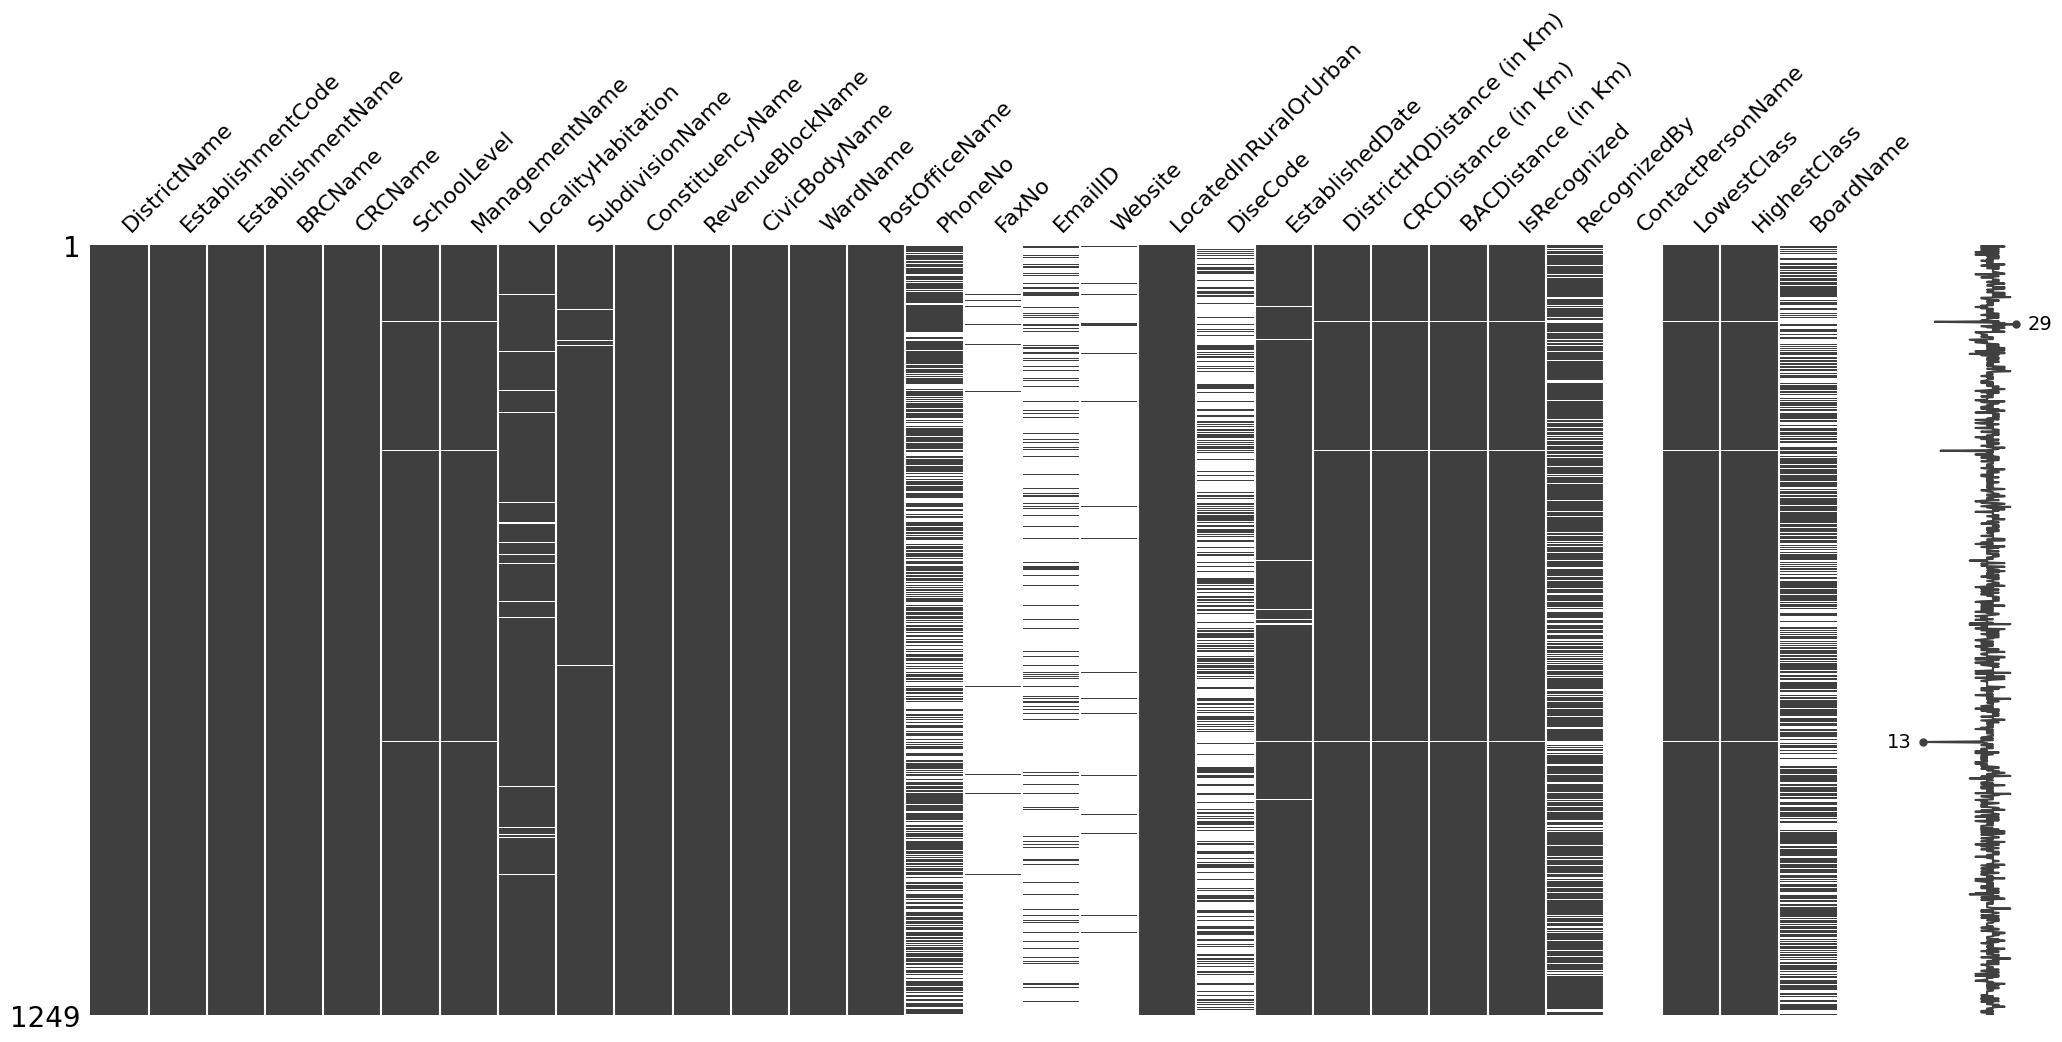

In [13]:
# Import missingno for visualization
import missingno
# Confirming there are 0 null values in left table
missingno.matrix(left_table)
left_table.isna().sum()

In [14]:
# Create the right table using all columns from facility_details
q = """SELECT * FROM facility_details"""
right_table = pd.read_sql(q, engine)
right_table.head(2)

,EstablishmentCode,EstablishmentName,IsLibraryAvailable,AvailableBooksCount,IsFireExtgAvailable,ExtinguisherCount,HOIRoomAvailable,IsStaffRoomAvailable,NoofStaffRoom,IsLockerForStaffAvailable,IsSportsStoreRoomAvailable
0,S1034,(I.E.C) INDIAN EVANGALISTIC CRUSADE MISSION PR...,Not Available,0,Available,1,Available,Not Available,0,Not Available,Not Available
1,S0516,10TH MILE GOVERNMENT PRIMARY SCHOOL,Not Available,0,Not Available,0,Available,Available,1,Not Available,Not Available


EstablishmentCode             0
EstablishmentName             0
IsLibraryAvailable            0
AvailableBooksCount           0
IsFireExtgAvailable           0
ExtinguisherCount             0
HOIRoomAvailable              0
IsStaffRoomAvailable          0
NoofStaffRoom                 0
IsLockerForStaffAvailable     0
IsSportsStoreRoomAvailable    0
dtype: int64

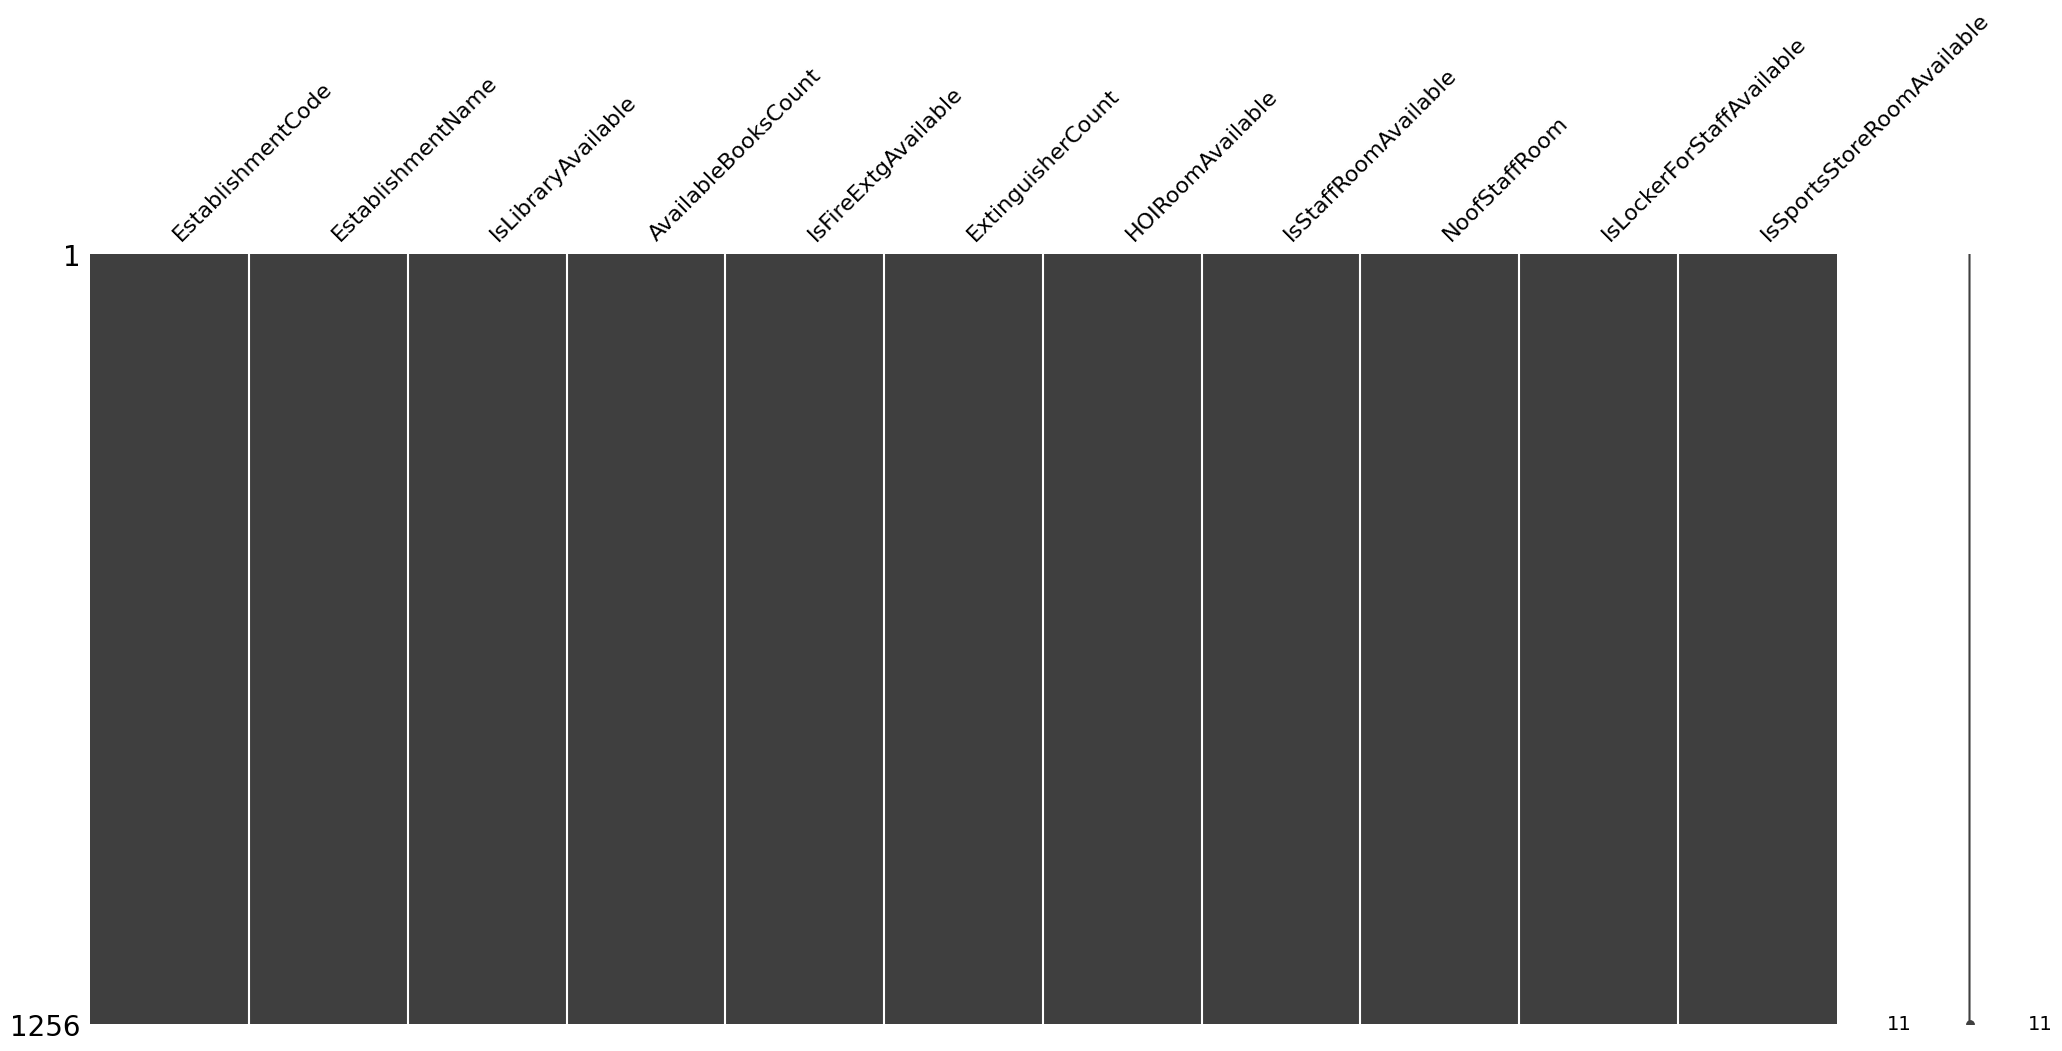

In [15]:
# Confirming there are 0 null values in right table
missingno.matrix(right_table)
right_table.isna().sum()

In [16]:
## Merging with the same column name
pd.merge(left_table,right_table, on='EstablishmentCode')

,DistrictName,EstablishmentCode,EstablishmentName_x,BRCName,CRCName,SchoolLevel,ManagementName,LocalityHabitation,SubdivisionName,ConstituencyName,RevenueBlockName,CivicBodyName,WardName,PostOfficeName,PhoneNo,FaxNo,EmailID,Website,LocatedInRuralOrUrban,DiseCode,EstablishedDate,DistrictHQDistance (in Km),CRCDistance (in Km),BACDistance (in Km),IsRecognized,RecognizedBy,ContactPersonName,LowestClass,HighestClass,BoardName,EstablishmentName_y,IsLibraryAvailable,AvailableBooksCount,IsFireExtgAvailable,ExtinguisherCount,HOIRoomAvailable,IsStaffRoomAvailable,NoofStaffRoom,IsLockerForStaffAvailable,IsSportsStoreRoomAvailable
0,East,S0169,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,PS,State Govt.,BUDANG,Gangtok,Rhenock,Central Pendam,Central Pendam,Sajong,Upper Pendam,None,None,None,None,Urban Area,None,28126,58.0,8.0,16.0,Recognized,HRDD,None,Class 1,Class 5,None,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Available,100,Available,2,Available,Available,1,Not Available,Not Available
1,East,S0099,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SSS,State Govt.,CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Karmithang,Upper Pendam,3592263812,None,None,None,Urban Area,800401,15342,50.0,0.0,6.0,Recognized,HRDD,None,Class 1,Class 12,C.B.S.E.,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Available,0,Available,5,Available,Available,2,Not Available,Available
2,East,S0848,"CENTRAL POINT ACADEMY, CENTRAL PENDAM",Duga Brc,Central Pendam Government Senior Secondary School,SS,Private (Unaided),UPPER BHURUNG CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Burung,Upper Pendam,03592263809/263960,None,ksu_5162@yahoo.com,www.facebook.com/khanalkeshav (Group-CPA),Urban Area,None,37257.38680555556,49.0,1.5,6.0,Recognized,"HRDD, GOVT. OF SIKKIM",None,Class 1,Class 10,C.B.S.E.,"CENTRAL POINT ACADEMY, CENTRAL PENDAM",Available,500,Available,1,Not Available,Available,1,Available,Available
3,East,S0190,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,JHS,State Govt.,CHEURIBOTEY,Gangtok,West Pandam,Central Pendam,Central Pendam,Cheuribotey,Duga,None,None,None,None,Urban Area,None,28856,60.0,6.0,6.0,Recognized,State Govt.,None,Class 1,Class 8,None,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),Available,120,Available,3,Available,Available,1,Not Available,Not Available
4,East,S0111,DUGA GOVERNMENT SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SS,State Govt.,DUGA,Gangtok,West Pandam,Central Pendam,Central Pendam,Duga,Duga,9832082915,None,dugaschool@gmail.com,None,Urban Area,None,1828,52.0,0.0,0.5,Recognized,c.b.s.e.,None,Class 1,Class 10,C.B.S.E.,DUGA GOVERNMENT SECONDARY SCHOOL,Available,0,Available,5,Available,Available,1,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,West,S0336,MANGSABONG GOVERNMENT PRIMARY SCHOOL,Yuksom Brc,Yuksom Government Secondary School,PS,State Govt.,MANGSABONG BUSTY,Gyalshing,Yoksam-Tashiding,Gerethang,Yuksom,Mangsabong,Yuksom,9733084983,None,None,None,Urban Area,None,29221,45.0,4.0,5.0,Recognized,STATE GOVERNMENT,None,Class 1,Class 5,None,MANGSABONG GOVERNMENT PRIMARY SCHOOL,Not Available,0,Available,1,Not Available,Not Available,0,Not Available,Not Available
1228,West,S0591,MANGTABONG GOVERNMENT PRIMARY SCHOOL(SSA),Yuksom Brc,Yuksom Government Secondary School,PS,State Govt.,MANGTABONG(YUKSAM),Gyalshing,Yoksam-Tashiding,Gerethang,Yuksom,Yoksam,Yuksom,None,None,None,None,Urban Area,603601,38508,52.0,2.0,5.0,Recognized,STATE GOVERNMENT,None,Class 1,Class 5,C.B.S.E.,MANGTABONG GOVERNMENT PRIMARY SCHOOL(SSA),Not Available,0,Available,2,Not Available,Not Available,0,Not Available,Available
1229,West,S1045,"NEW HORIZON ACADEMY, LASSO(TASHIDING)",Yuksom Brc,Yuksom Gove

In [17]:
inner_join = pd.merge(left_table, right_table, on='EstablishmentCode', indicator=True)
inner_join.head()

,DistrictName,EstablishmentCode,EstablishmentName_x,BRCName,CRCName,SchoolLevel,ManagementName,LocalityHabitation,SubdivisionName,ConstituencyName,RevenueBlockName,CivicBodyName,WardName,PostOfficeName,PhoneNo,FaxNo,EmailID,Website,LocatedInRuralOrUrban,DiseCode,EstablishedDate,DistrictHQDistance (in Km),CRCDistance (in Km),BACDistance (in Km),IsRecognized,RecognizedBy,ContactPersonName,LowestClass,HighestClass,BoardName,EstablishmentName_y,IsLibraryAvailable,AvailableBooksCount,IsFireExtgAvailable,ExtinguisherCount,HOIRoomAvailable,IsStaffRoomAvailable,NoofStaffRoom,IsLockerForStaffAvailable,IsSportsStoreRoomAvailable,_merge
0,East,S0169,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,PS,State Govt.,BUDANG,Gangtok,Rhenock,Central Pendam,Central Pendam,Sajong,Upper Pendam,None,None,None,None,Urban Area,None,28126,58.0,8.0,16.0,Recognized,HRDD,None,Class 1,Class 5,None,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Available,100,Available,2,Available,Available,1,Not Available,Not Available,both
1,East,S0099,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SSS,State Govt.,CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Karmithang,Upper Pendam,3592263812,None,None,None,Urban Area,800401,15342,50.0,0.0,6.0,Recognized,HRDD,None,Class 1,Class 12,C.B.S.E.,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Available,0,Available,5,Available,Available,2,Not Available,Available,both
2,East,S0848,"CENTRAL POINT ACADEMY, CENTRAL PENDAM",Duga Brc,Central Pendam Government Senior Secondary School,SS,Private (Unaided),UPPER BHURUNG CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Burung,Upper Pendam,03592263809/263960,None,ksu_5162@yahoo.com,www.facebook.com/khanalkeshav (Group-CPA),Urban Area,None,37257.38680555556,49.0,1.5,6.0,Recognized,"HRDD, GOVT. OF SIKKIM",None,Class 1,Class 10,C.B.S.E.,"CENTRAL POINT ACADEMY, CENTRAL PENDAM",Available,500,Available,1,Not Available,Available,1,Available,Available,both
3,East,S0190,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,JHS,State Govt.,CHEURIBOTEY,Gangtok,West Pandam,Central Pendam,Central Pendam,Cheuribotey,Duga,None,None,None,None,Urban Area,None,28856,60.0,6.0,6.0,Recognized,State Govt.,None,Class 1,Class 8,None,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),Available,120,Available,3,Available,Available,1,Not Available,Not Available,both
4,East,S0111,DUGA GOVERNMENT SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SS,State Govt.,DUGA,Gangtok,West Pandam,Central Pendam,Central Pendam,Duga,Duga,9832082915,None,dugaschool@gmail.com,None,Urban Area,None,1828,52.0,0.0,0.5,Recognized,c.b.s.e.,None,Class 1,Class 10,C.B.S.E.,DUGA GOVERNMENT SECONDARY SCHOOL,Available,0,Available,5,Available,Available,1,Not Available,Not Available,both


In [18]:
inner_join.value_counts()

Series([], dtype: int64)

In [19]:
q = """SELECT *
FROM school_details sd INNER JOIN facility_details fd
 ON sd.EstablishmentCode = fd.EstablishmentCode"""
pd.read_sql(q, conn)

,DistrictName,EstablishmentCode,EstablishmentName,BRCName,CRCName,SchoolLevel,ManagementName,LocalityHabitation,SubdivisionName,ConstituencyName,RevenueBlockName,CivicBodyName,WardName,PostOfficeName,PhoneNo,FaxNo,EmailID,Website,LocatedInRuralOrUrban,DiseCode,EstablishedDate,DistrictHQDistance (in Km),CRCDistance (in Km),BACDistance (in Km),IsRecognized,RecognizedBy,ContactPersonName,LowestClass,HighestClass,BoardName,EstablishmentCode,EstablishmentName,IsLibraryAvailable,AvailableBooksCount,IsFireExtgAvailable,ExtinguisherCount,HOIRoomAvailable,IsStaffRoomAvailable,NoofStaffRoom,IsLockerForStaffAvailable,IsSportsStoreRoomAvailable
0,East,S0169,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,PS,State Govt.,BUDANG,Gangtok,Rhenock,Central Pendam,Central Pendam,Sajong,Upper Pendam,None,None,None,None,Urban Area,None,28126,58.0,8.0,16.0,Recognized,HRDD,None,Class 1,Class 5,None,S0169,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Available,100,Available,2,Available,Available,1,Not Available,Not Available
1,East,S0099,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SSS,State Govt.,CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Karmithang,Upper Pendam,3592263812,None,None,None,Urban Area,800401,15342,50.0,0.0,6.0,Recognized,HRDD,None,Class 1,Class 12,C.B.S.E.,S0099,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Available,0,Available,5,Available,Available,2,Not Available,Available
2,East,S0848,"CENTRAL POINT ACADEMY, CENTRAL PENDAM",Duga Brc,Central Pendam Government Senior Secondary School,SS,Private (Unaided),UPPER BHURUNG CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Burung,Upper Pendam,03592263809/263960,None,ksu_5162@yahoo.com,www.facebook.com/khanalkeshav (Group-CPA),Urban Area,None,37257.38680555556,49.0,1.5,6.0,Recognized,"HRDD, GOVT. OF SIKKIM",None,Class 1,Class 10,C.B.S.E.,S0848,"CENTRAL POINT ACADEMY, CENTRAL PENDAM",Available,500,Available,1,Not Available,Available,1,Available,Available
3,East,S0190,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,JHS,State Govt.,CHEURIBOTEY,Gangtok,West Pandam,Central Pendam,Central Pendam,Cheuribotey,Duga,None,None,None,None,Urban Area,None,28856,60.0,6.0,6.0,Recognized,State Govt.,None,Class 1,Class 8,None,S0190,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),Available,120,Available,3,Available,Available,1,Not Available,Not Available
4,East,S0111,DUGA GOVERNMENT SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SS,State Govt.,DUGA,Gangtok,West Pandam,Central Pendam,Central Pendam,Duga,Duga,9832082915,None,dugaschool@gmail.com,None,Urban Area,None,1828,52.0,0.0,0.5,Recognized,c.b.s.e.,None,Class 1,Class 10,C.B.S.E.,S0111,DUGA GOVERNMENT SECONDARY SCHOOL,Available,0,Available,5,Available,Available,1,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,West,S0336,MANGSABONG GOVERNMENT PRIMARY SCHOOL,Yuksom Brc,Yuksom Government Secondary School,PS,State Govt.,MANGSABONG BUSTY,Gyalshing,Yoksam-Tashiding,Gerethang,Yuksom,Mangsabong,Yuksom,9733084983,None,None,None,Urban Area,None,29221,45.0,4.0,5.0,Recognized,STATE GOVERNMENT,None,Class 1,Class 5,None,S0336,MANGSABONG GOVERNMENT PRIMARY SCHOOL,Not Available,0,Available,1,Not Available,Not Available,0,Not Available,Not Available
1228,West,S0591,MANGTABONG GOVERNMENT PRIMARY SCHOOL(SSA),Yuksom Brc,Yuksom Government Secondary School,PS,State Govt.,MANGTABONG(YUKSAM),Gyalshing,Yoksam-Tashiding,Gerethang,Yuksom,Yoksam,Yuksom,None,None,None,None,Urban Area,603601,38508,52.0,2.0,5.0,Recognized,STATE GOVERNMENT,None,Class 1,Class 5,C.B.S.E.,S0591,MANGTABONG GOVERNMENT PRIMARY SCHOOL(SSA),Not Available,0,Available,2,Not Available,Not Available,0,Not Available,Available
1229,West,S1045,"N

##  5. Select just the schools where the SchoolLevel is "PS" that do not have libraries.

In [20]:
# INNER JOIN
q = """SELECT sd.EstablishmentName, sd.SchoolLevel, fd.IsLibraryAvailable
FROM school_details sd INNER JOIN facility_details fd
 ON sd.EstablishmentCode = fd.EstablishmentCode
WHERE fd.IsLibraryAvailable LIKE 'Not%' AND sd.SchoolLevel = 'PS'"""
# pd.read_sql(q,engine)
pd.read_sql(q, conn)

,EstablishmentName,SchoolLevel,IsLibraryAvailable
0,EASWARAMMA SAI GURUKOOL ACCADEMY,PS,Not Available
1,NEW GARDEN BOARDING SCHOOL (SAJONG),PS,Not Available
2,"SARASWATI SHISHU VIDHYALAYA, BUDANG",PS,Not Available
3,SAWNEY GOVERNMENT PRIMARY SCHOOL,PS,Not Available
4,UPPER PACHAK GOVERNMENT PRIMARY SCHOOL,PS,Not Available
...,...,...,...
418,TASHIDING ENGLISH SCHOOL (P.S),PS,Not Available
419,MANGSABONG GOVERNMENT PRIMARY SCHOOL,PS,Not Available
420,MANGTABONG GOVERNMENT PRIMARY SCHOOL(SSA),PS,Not Available
421,"NEW HORIZON ACADEMY, LASSO(TASHIDING)",PS,Not Available


##  6. Build off the previous query, but order the results alphabetically by name.

In [21]:
# INNER JOIN
q = """SELECT sd.EstablishmentName, sd.SchoolLevel, fd.IsLibraryAvailable
FROM school_details sd INNER JOIN facility_details fd
 ON sd.EstablishmentCode = fd.EstablishmentCode
WHERE fd.IsLibraryAvailable LIKE 'Not%' AND sd.SchoolLevel = 'PS'
ORDER BY  sd.EstablishmentName;"""
# pd.read_sql(q,engine)
pd.read_sql(q, conn)

,EstablishmentName,SchoolLevel,IsLibraryAvailable
0,(I.E.C) INDIAN EVANGALISTIC CRUSADE MISSION PR...,PS,Not Available
1,10TH MILE GOVERNMENT PRIMARY SCHOOL,PS,Not Available
2,AAPGAZI GOVERNMENT PRIMARY SCHOOL,PS,Not Available
3,AARUBOTEY GOVERNMENT PRIMARY SCHOOL,PS,Not Available
4,AHO-YANGTAM GOVERNMENT PRIMARY SCHOOL,PS,Not Available
...,...,...,...
418,"WRENS PUBLIC SCHOOL, ARITHANG",PS,Not Available
419,YALLI GOVERNMENT PRIMARY SCHOOL,PS,Not Available
420,YANGTEY GOVERNMENT PRIMARY SCHOOL,PS,Not Available
421,ZENITH PUBLIC SCHOOL,PS,Not Available


##  My submission